# Time warping
Pitch control

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from rustic.utils import generate_wave, time_scale
from rustic.generator import Generator

In [2]:
SAMPLE_RATE = 1000
DURATION = 1

In [3]:
sine_wave = generate_wave(freq=20, duration=DURATION, sr=SAMPLE_RATE)

Text(0.5, 1.0, '20Hz over 1 second(s)')

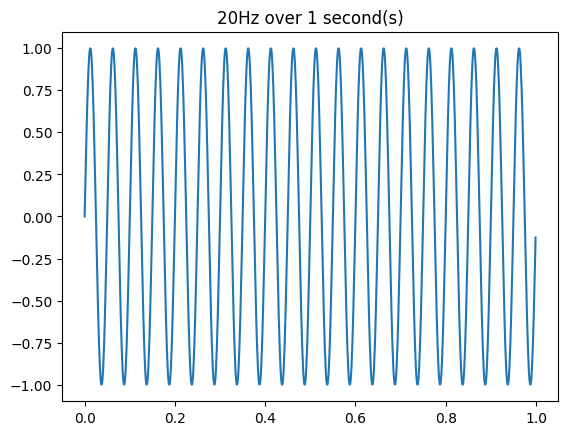

In [4]:
plt.plot(time_scale(DURATION * SAMPLE_RATE, sample_rate=SAMPLE_RATE), sine_wave)
plt.title(f"20Hz over {DURATION} second(s)")

In [5]:
generator = Generator(20)

values = []

# Warp time to 0.5 after 0.3 seconds then beck to 1 after 0.3 seconds
for x in range(DURATION * SAMPLE_RATE):
    actual_time = x / SAMPLE_RATE
    warp = 1.0
    if actual_time < 0.3:
        warp = 1.0
    elif actual_time < 0.6:
        warp = 0.5
    elif actual_time < 0.9:
        warp = 2.0
    value = generator.tick(1 / SAMPLE_RATE, warp=warp)
    values.append(value)

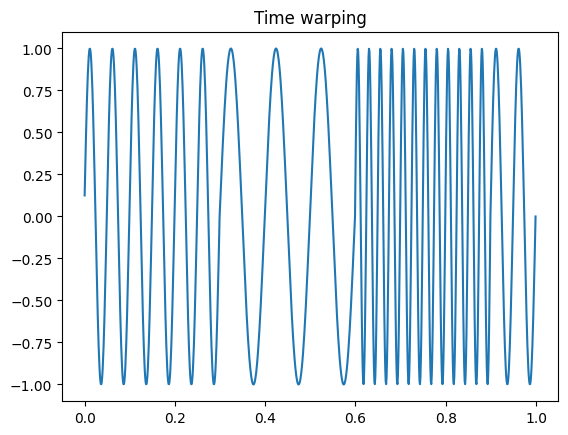

In [6]:
plt.plot(time_scale(DURATION * SAMPLE_RATE, sample_rate=SAMPLE_RATE), values)
plt.title("Time warping")
plt.show()

# Making a drum sound

In [9]:
generator = Generator(20)

values = []

# Warp time to 0.5 after 0.3 seconds then beck to 1 after 0.3 seconds
for x in range(DURATION * SAMPLE_RATE):
    actual_time = x / SAMPLE_RATE
    warp = 1.0
    if actual_time < 0.5:
        warp = (0.5 - actual_time) * 2 * 5 + 1.0
    value = generator.tick(1 / SAMPLE_RATE, warp=warp)
    values.append(value)

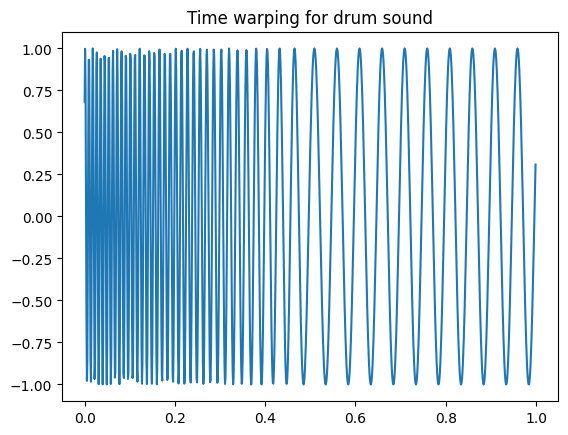

In [8]:
plt.plot(time_scale(DURATION * SAMPLE_RATE, sample_rate=SAMPLE_RATE), values)
plt.title("Time warping for drum sound")
plt.show()